KNN- Classification

In [2]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize pixel values
X_normalized = StandardScaler().fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)  # Try k values from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

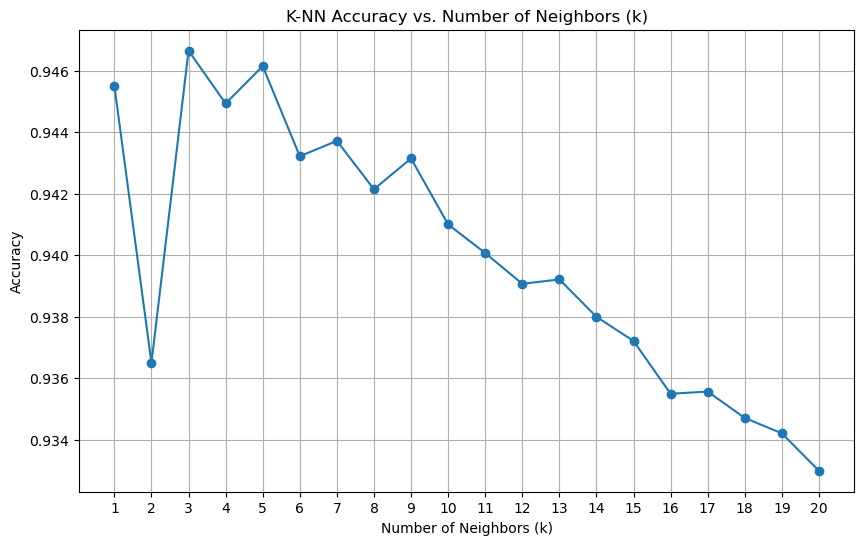

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

we can say that k=3 gives us a best result. afte incerisng the k-value accuracy also decrease.

Accuracy: 0.9461428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.89      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix:
 [[1319    0    4    2    0    5   10    2    1    0]
 [   0 1588    7    1    2    0    1    1    0    0]
 [   9   18 1290   18    7    7    8    9    8    6]
 [   1    

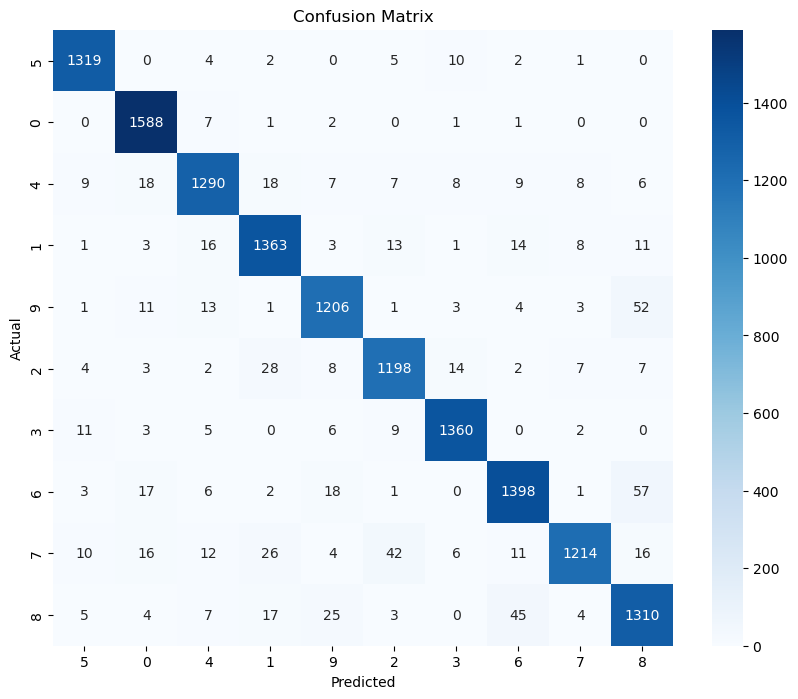

In [6]:
k = 5  # You can adjust the number of neighbors (k) as needed.
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=df.label.unique(), yticklabels=df.label.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()